Restructuring adjacency matrix for test_location1 since root node is not at index 0


100%|██████████| 100/100 [00:10<00:00,  9.11it/s]


# final solutions: 2


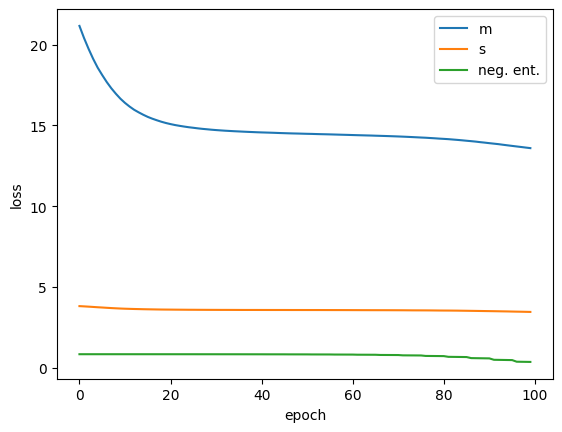

test_location1
5 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

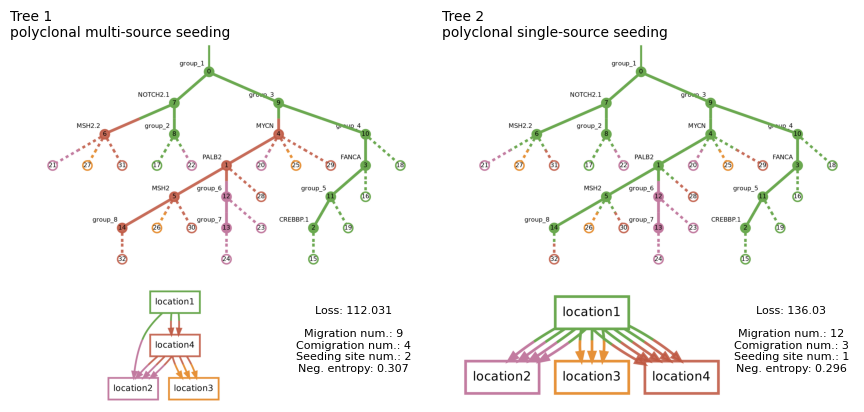

Restructuring adjacency matrix for test_location2 since root node is not at index 0


100%|██████████| 100/100 [00:12<00:00,  7.72it/s]


# final solutions: 2


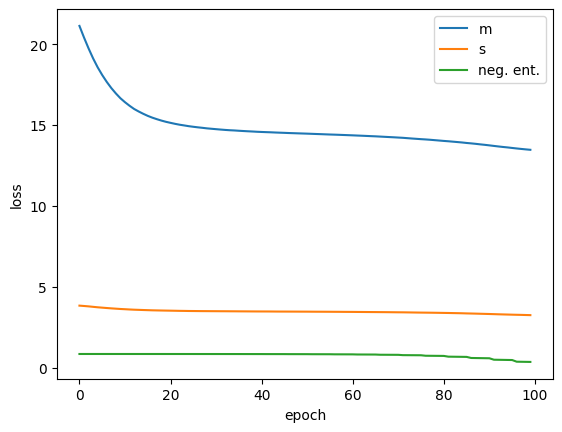

test_location2
5 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

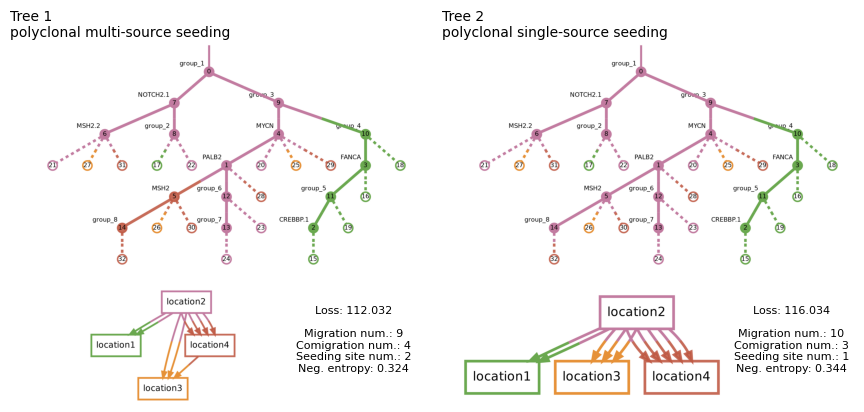

Restructuring adjacency matrix for test_location3 since root node is not at index 0


100%|██████████| 100/100 [00:11<00:00,  8.92it/s]


# final solutions: 2


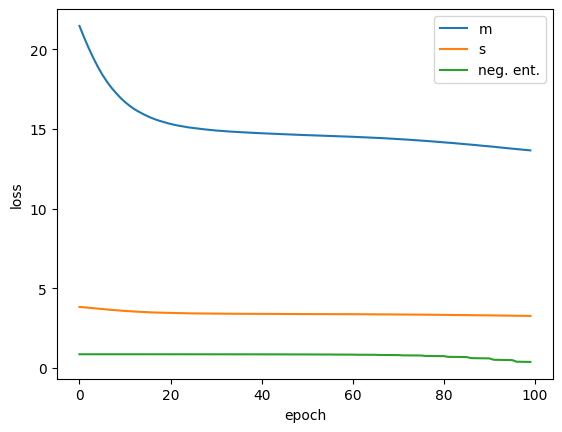

test_location3
5 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

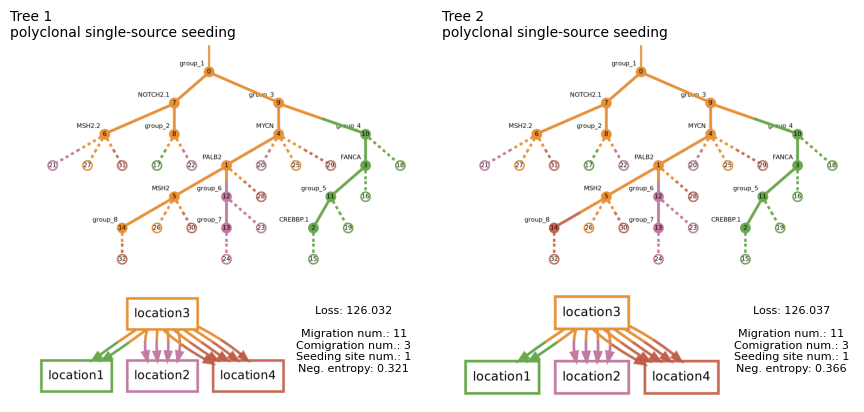

Restructuring adjacency matrix for test_location4 since root node is not at index 0


100%|██████████| 100/100 [00:27<00:00,  3.61it/s]


# final solutions: 1


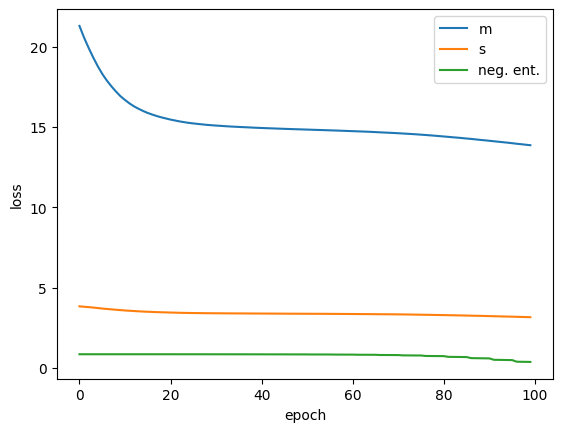

test_location4
5 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

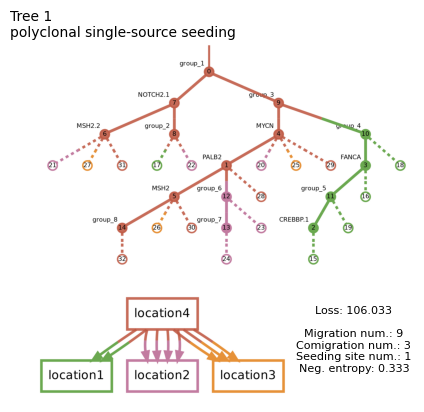

In [15]:
import os
import pandas as pd

### Import metient
from metient import metient as met

freq_fn = "testcase.tsv"
ref, var, ordered_sites, idx_to_label_dict =  met.get_ref_var_matrices(freq_fn)

# Construct adjacency matrix
import torch
with open("tree.txt") as f:
    label_to_idx_dict = {v:k for k,v in idx_to_label_dict.items()}
    num_nodes = len(label_to_idx_dict)
    T = torch.zeros((num_nodes, num_nodes))
    for line in f:
        if "#" not in line:
            i = label_to_idx_dict[line.strip().split()[0]]
            j = label_to_idx_dict[line.strip().split()[1]]
            T[i, j] = 1

weights = met.Weights()
print_config = met.PrintConfig(visualize=True, verbose=False, k_best_trees=5)

for primary in ['location1','location2','location3','location4']:
    met.evaluate(T, ref, var, ordered_sites, primary, idx_to_label_dict,
                 weights, print_config, os.getcwd(), f'test_{primary}', 
                 weight_init_primary=True, batch_size=10000)
            